In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
print("Number of Rows",data.shape[0])
print("Number of Colums",data.shape[1])

Number of Rows 1338
Number of Colums 7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [14]:
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
X=data.drop(['charges'],axis=1)

In [16]:
y=data['charges']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=.20,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

In [21]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test, 'lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})



In [22]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11323.469131,11001.128629
887,5272.17580,7116.295018,9492.515425,5634.281863,5840.174656
890,29330.98315,36909.013521,9648.758701,28346.032200,28001.980112
1293,9301.89355,9507.874691,9555.044136,10071.742224,9745.291602
259,33750.29180,27013.350008,9420.421978,34725.642642,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47127.388584,45431.423211
575,12222.89830,11814.555568,9625.431547,12586.184948,12465.025294
535,6067.12675,7638.107736,9504.168517,6468.993095,6974.336525
543,63770.42801,40959.081722,9605.004594,46587.591980,47862.047791


In [23]:
import matplotlib.pyplot as plt

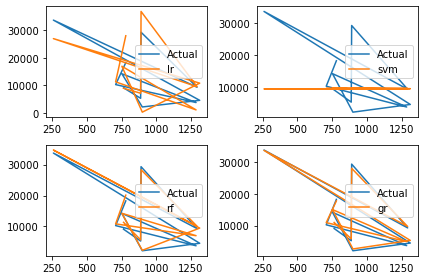

In [24]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['lr'].iloc[0:11], label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['svm'].iloc[0:11], label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['rf'].iloc[0:11], label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['gr'].iloc[0:11], label='gr')

plt.tight_layout()

plt.legend()

# Evalutation

In [25]:
from sklearn import metrics

In [26]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [27]:
print(score1, score2, score3,  score4)
    

0.7833463107364539 -0.07229762787861826 0.8638585883056356 0.8779726251291786


In [28]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

In [29]:
print(s1, s2, s3, s4)

4186.508898366435 8592.428727899724 2525.5355226701186 2447.951558054584


In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [34]:
data = {'age':40,
'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2}

df = pd.DataFrame(data,index=[0])
df
       

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [35]:
new_pred = gr.predict(df)
print(new_pred)

[43839.34586293]


# save model use joblib

In [36]:
gr = GradientBoostingRegressor()
gr.fit(X,y)


GradientBoostingRegressor()

In [43]:
import joblib

In [44]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [47]:
model1 = joblib.load('model_joblib_gr')

In [48]:
model1.predict(df)

array([42148.361888])

# GUI

In [61]:
from tkinter import*

In [62]:
import joblib

In [77]:
def Show_entry():
    
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e4.get())
    p6 = float(e6.get())
    
    model1 = joblib.load('model_joblib_gr')
    result = model1.predict([[p1,p2,p3,p4,p5,p6]])
    
    
    tkinter.Label(master,text="insurance cost").grid(row=7)
    tkinter.Label(master,text=result).grid(row=8)


    
    








import tkinter

master = tkinter.Tk()
master.title("insurance cost prediction")
label = tkinter.Label (master,text="insurance cost prediction",bg = "black",
             fg = "white").grid(row=0,columnspan=2)

tkinter.Label(master,text="Enter your age").grid(row=1)
tkinter.Label(master,text="Male or Femalr [0\1]").grid(row=2)
tkinter.Label(master,text="Enter BMI value").grid(row=3)
tkinter.Label(master,text="Enter number of childern").grid(row=4)
tkinter.Label(master,text="Rmoker yes or no [0\1]").grid(row=5)
tkinter.Label(master,text="Region [1-4]").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)


Button(master,text="predict",command=Show_entry).grid()



mainloop()